<a href="https://colab.research.google.com/github/Daivar/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
!unzip Covid_Data_GradientCrescent.zip

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
100% 154M/154M [00:02<00:00, 72.8MB/s]
Archive:  Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
 

In [6]:
from numpy.random import seed
seed(8) #1
import tensorflow
from tensorflow.python.framework.random_seed import set_random_seed
tensorflow.random.set_seed(1)
set_random_seed(7) #2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [7]:
print(os.listdir("/content/"))

['.config', 'Covid_Data_GradientCrescent.zip', 'two', 'all', 'sample_data']


In [8]:
!rm Covid_Data_GradientCrescent.zip

In [9]:
!rm -rf /content/all/test/pneumonia_vir

In [10]:
!rm -rf /content/all/train/pneumonia_vir

In [11]:
from os import listdir
data_list = listdir('/content/all/train')


In [12]:
data_list

['normal', 'pneumonia_bac', 'covid']

In [13]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [66]:
DATASET_PATH  = '/content/all/train'
test_dir =  '/content/all/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE =0.0001

In [67]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [68]:
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )


Found 160 images belonging to 3 classes.


In [69]:
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )

Found 40 images belonging to 3 classes.


In [70]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import applications
# from keras.applications import VGG16
from keras import optimizers


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'])

In [71]:
tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [72]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               2097408   
                                                                 
 dense_19 (Dense)            (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [1]:
!nvidia-smi

Sat Jan  1 19:15:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [73]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                         steps_per_epoch =STEP_SIZE_TRAIN,
                         validation_data = valid_batches,
                         validation_steps = STEP_SIZE_VALID,
                         epochs= NUM_EPOCHS,                        
                       )


16
4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
16/16 [==============================] - 7s 393ms/step - loss: 1.6710 - acc: 0.4875 - val_loss: 0.9419 - val_acc: 0.5500
Epoch 2/100
16/16 [==============================] - 6s 364ms/step - loss: 0.8730 - acc: 0.6187 - val_loss: 0.7245 - val_acc: 0.6000
Epoch 3/100
16/16 [==============================] - 6s 361ms/step - loss: 0.8373 - acc: 0.6062 - val_loss: 0.5499 - val_acc: 0.7500
Epoch 4/100
16/16 [==============================] - 6s 363ms/step - loss: 0.5973 - acc: 0.7250 - val_loss: 0.5569 - val_acc: 0.7500
Epoch 5/100
16/16 [==============================] - 6s 363ms/step - loss: 0.5724 - acc: 0.7563 - val_loss: 0.4938 - val_acc: 0.8000
Epoch 6/100
16/16 [==============================] - 6s 351ms/step - loss: 0.4327 - acc: 0.8188 - val_loss: 0.5084 - val_acc: 0.7750
Epoch 7/100
16/16 [==============================] - 6s 353ms/step - loss: 0.4531 - acc: 0.8500 - val_loss: 0.5455 - val_acc: 0.6750
Epoch 8/100
16/16 [==============================] - 6s 360ms/step - 

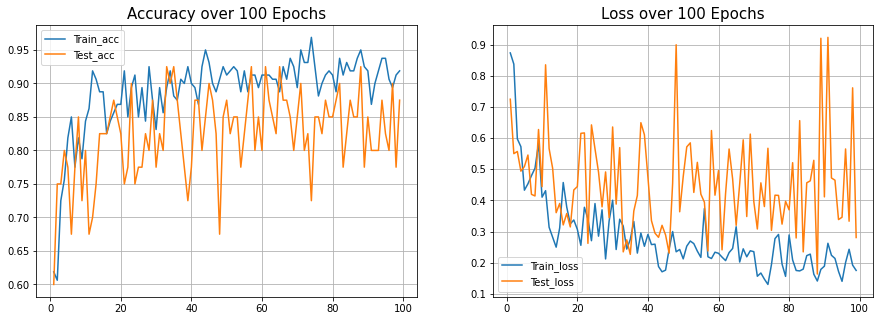

In [74]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 100)

In [76]:
model.save('Covid_Multi.h5')

In [77]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=True,
        seed=42,
        
        class_mode="categorical")
eval_generator.reset()  

Found 27 images belonging to 3 classes.


In [90]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


3/3 [==============================] - 1s 27ms/step - loss: 0.1298 - acc: 1.0000
Test loss: 0.12978394329547882
Test accuracy: 1.0


In [94]:
model.compile(loss='categorical_crossentropy',
              
              optimizer='adam',
              metrics=['acc'])

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= 20,                        
                       )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
16/16 [==============================] - 7s 393ms/step - loss: 0.3830 - acc: 0.8625 - val_loss: 1.0409 - val_acc: 0.7750
Epoch 2/20
16/16 [==============================] - 6s 350ms/step - loss: 0.2019 - acc: 0.9187 - val_loss: 0.1523 - val_acc: 0.9250
Epoch 3/20
16/16 [==============================] - 6s 355ms/step - loss: 0.1261 - acc: 0.9625 - val_loss: 0.2498 - val_acc: 0.9000
Epoch 4/20
16/16 [==============================] - 6s 366ms/step - loss: 0.1610 - acc: 0.9500 - val_loss: 0.5982 - val_acc: 0.8250
Epoch 5/20
16/16 [==============================] - 6s 366ms/step - loss: 0.1701 - acc: 0.9250 - val_loss: 0.3540 - val_acc: 0.8750
Epoch 6/20
16/16 [==============================] - 6s 365ms/step - loss: 0.1891 - acc: 0.9187 - val_loss: 0.5459 - val_acc: 0.8750
Epoch 7/20
16/16 [==============================] - 6s 367ms/step - loss: 0.2541 - acc: 0.8875 - val_loss: 0.5364 - val_acc: 0.8000
Epoch 8/20
16/16 [==============================] - 6s 370ms/step - loss: 0.

In [95]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


3/3 [==============================] - 0s 52ms/step - loss: 0.0869 - acc: 1.0000
Test loss: 0.0869305431842804
Test accuracy: 1.0
